In [ ]:
phenotype <- "both"
hla_genes <- c('DQB1', 'DQA1', 'B', 'DPB1', 'DPA1', 'A', 'C')
hla_gene <- 'DQA1'
cond_round <- 2
using_groups <- TRUE
source('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_scripts/Conditional_haplotype_on_combined_IKMB_data.r')

In [6]:
test <- na.omit(fread('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/conditional_analysis/with_groups/both/DQA1_conditional_round_3.tsv'))

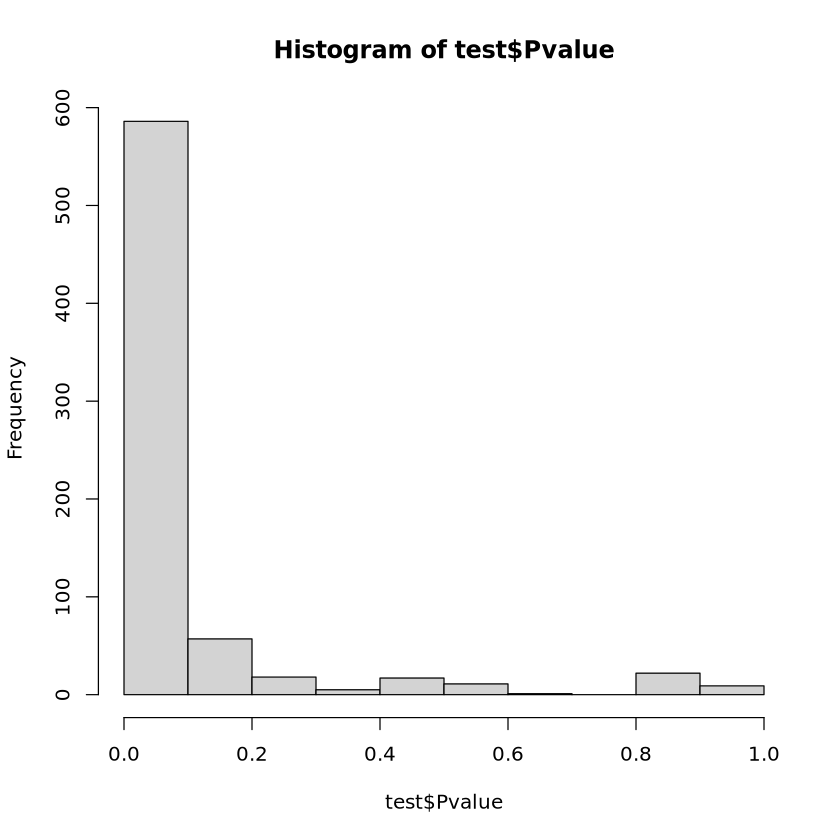

In [9]:
hist(test$Pvalue)

In [3]:
source('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/libraries_visuals.R')
source('/work_beegfs/sukmb667/projects/cdr3-qtl/healthy_and_ibd/scripts/R_functions/cdr3-QTL_functions.R')

In [4]:
smallest_number <- .Machine$double.xmin

In [5]:
A_pocket <- c(5, 59, 63, 66, 163, 167, 171)
B_pocket <- c(7, 9, 24, 34, 45, 63, 67, 99)
C_pocket <- c(70, 73, 74, 97)
D_pocket <- c(99, 155, 159, 160)
E_pocket <- c(97, 114, 147, 152, 156)
F_pocket <- c(77, 80, 81, 84, 95, 123, 143, 146)
class_I_pockets_dict <- data.frame(Pocket = c(rep('A_pocket',length(A_pocket)), rep('B_pocket',length(B_pocket)), rep('C_pocket',length(C_pocket)), 
                                       rep('D_pocket',length(D_pocket)), rep('E_pocket',length(E_pocket)), rep('F_pocket',length(F_pocket))),
                           Site_hla = c(A_pocket,B_pocket,C_pocket,D_pocket,E_pocket,F_pocket))
Class_I <- c('A', 'B', 'C')
pockets_df <- crossing(class_I_pockets_dict, HLA = Class_I)

P1 <- c(7, 9, 24, 31, 32, 43, 52)
P6 <- c(11, 62, 65, 66, 69)
P9 <- c( 68, 69, 72, 73, 76)
class_II_alpha_pockets_dict <- data.frame(Pocket = c(rep('P1',length(P1)), rep('P6',length(P6)), rep('P9',length(P9))), 
                         Site_hla = c(P1,P6,P9))
Class_II_alpha <- c('DQA1', 'DPA1')
pockets_df_II_alpha <- crossing(class_II_alpha_pockets_dict, HLA = Class_II_alpha)

P1 <- c(85, 86, 89, 90)
P4 <- c(13, 26, 28, 70, 74, 78)
P6 <- c(11, 30)
P7 <- c(28, 47, 61, 67, 71)  
P9 <- c(9, 37, 57)
class_II_beta_pockets_dict <- data.frame(Pocket = c(rep('P1',length(P1)), rep('P4',length(P4)),rep('P6',length(P6)), 
                                         rep('P7',length(P7)), rep('P9',length(P9))), 
                                         Site_hla = c(P1,P4,P6,P7,P9))
Class_II_beta <- c('DRB1','DQB1', 'DPB1')
pockets_df_II_beta <- crossing(class_II_beta_pockets_dict, HLA = Class_II_beta)
pockets_df <- rbind(pockets_df, pockets_df_II_alpha, pockets_df_II_beta)

### Highlighting independent sites on the MAIN Manhattan plot and HLH, and DOWNSAMPLED IBD

In [12]:
hla_genes <- c('A', 'C', 'B','DRB1','DQA1','DQB1','DPA1', 'DPB1')
main_manova <- fread('../manova_results_9PCs.tsv')
bonf <- 0.01 / nrow(na.omit(main_manova))
main_manova$condition <- NA
main_manova <- main_manova[, c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3') := tstrsplit(pair, ":", fixed = TRUE)]
main_manova[Pr..F. == 0, Pr..F. := smallest_number]
main_manova[, Site_hla := as.integer(Site_hla)]
min_P_signals <- main_manova %>% 
    dplyr::select(HLA, Site_hla, Pr..F. ) %>% na.omit() %>%
    group_by(HLA, Site_hla) %>% reframe(Pr..F. = min(Pr..F.))
manova_cond_sites <- data.frame(sites = gsub('.tsv','', gsub('manova_', '', grep('manova', list.files('../conditional_analysis//all_9PCs/'), value = TRUE)))) %>%
    separate(sites, into = c('HLA', 'Site_hla')) %>% mutate(Site_hla = as.integer(Site_hla), dataset = "Both") %>% 
    rbind(data.frame(sites = gsub('.tsv','', gsub('manova_', '', grep('manova', list.files('../conditional_analysis/HEALTHY/all_9PCs/'), value = TRUE)))) %>%
        separate(sites, into = c('HLA', 'Site_hla')) %>% mutate(Site_hla = as.integer(Site_hla), dataset = "Healthy")) %>% 
    rbind(data.frame(sites = gsub('.tsv','', gsub('manova_', '', grep('manova', list.files('../conditional_analysis/IBD/IBD_downsampled/all_9PCs/'), value = TRUE)))) %>%
        separate(sites, into = c('HLA', 'Site_hla')) %>% mutate(Site_hla = as.integer(Site_hla), dataset = "dIBD"))


In [13]:
manova_cond_sites

HLA,Site_hla,dataset
<chr>,<int>,<chr>
A,149,Both
A,62,Both
B,143,Both
B,152,Both
B,156,Both
B,163,Both
B,199,Both
B,9,Both
B,97,Both


In [15]:
manova_cond_sites_with_P <- inner_join(manova_cond_sites, min_P_signals)
head(manova_cond_sites_with_P)

Joining with `by = join_by(HLA, Site_hla)`


,HLA,Site_hla,dataset,Pr..F.
,<chr>,<int>,<chr>,<dbl>
1,A,149,Both,4.461967e-14
2,A,62,Both,3.461768e-33
3,B,143,Both,5.533208e-10
4,B,152,Both,2.200729e-39
5,B,156,Both,1.042119e-85
6,B,163,Both,3.656746e-31


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 19951 rows containing missing values or values outside the scale range (`geom_point()`).”


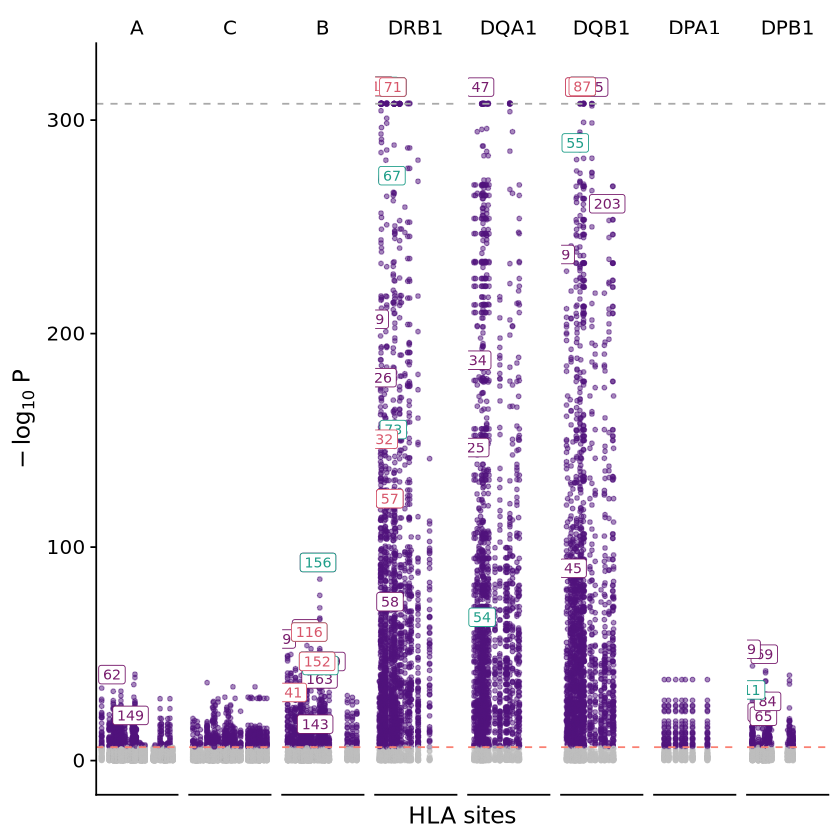

In [35]:
miami_plot <- ggplot() +
    geom_point(data = main_manova, 
               aes(x = Site_hla, y = -log10(Pr..F.), colour = ifelse(Pr..F. > bonf, 'not significant', 'significant')), 
               alpha=0.5, size=1, show.legend = FALSE) +
    scale_color_manual(values = c('not significant' = 'grey', 'significant' = '#51127c')) +
    new_scale_color() + 
    #geom_rug(data = emerson_alleles_n_variat%>%filter(gene=='DRB1'), aes(x = site, color = n_variat)) +    
    #scale_fill_gradient(low = 'white', high = '#57106e') +
    new_scale_color() + 
    geom_label(data = manova_cond_sites_with_P, 
               aes(x = Site_hla, y = -log10(Pr..F.), label = Site_hla, color = as.factor(dataset)), 
               hjust=0.55,vjust=-0.4,size=3, show.legend = FALSE) + 
    scale_color_manual(values = c("dIBD" = "#d8576b", "Healthy" = "#1f9e89", "Both" = "#781c6d")) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "salmon") +
    geom_hline(yintercept= - log10(smallest_number), linetype = "dashed", color = "darkgrey") +
    theme_cowplot() +
    facet_wrap(~factor(HLA, levels = hla_genes), ncol = 8) +
    theme(legend.position = "none", axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank()) +
    ylim(0,320)
miami_plot

In [36]:
ggsave('../plots/main_manhattan_labelled_9PCs_all.jpg',miami_plot, width = 20, height = 6) 

Warning message:
“Removed 19951 rows containing missing values or values outside the scale range (`geom_point()`).”


### Visualisation of independent sites per each HLA gene of interest

In [ ]:
hlh <- fread('../manova_results_9PCs.tsv')

In [ ]:
main_manova <- fread('../manova_results_9PCs.tsv')
bonf <- 0.01 / nrow(na.omit(main_manova))
main_manova$condition <- NA
main_manova <- main_manova[, c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3') := tstrsplit(pair, ":", fixed = TRUE)]
main_manova[Pr..F. == 0, Pr..F. := smallest_number]
main_manova[, Site_hla := as.integer(Site_hla)]
min_P_signals <- main_manova %>% 
    dplyr::select(HLA, Site_hla, Pr..F. ) %>% na.omit() %>%
    group_by(HLA, Site_hla) %>% reframe(Pr..F. = min(Pr..F.))
manova_cond_sites <- data.frame(sites = gsub('.tsv','', gsub('manova_', '', grep('manova', list.files('../conditional_analysis//all_9PCs/'), value = TRUE)))) %>%
    separate(sites, into = c('HLA', 'Site_hla')) %>% mutate(Site_hla = as.integer(Site_hla), dataset = "Both") %>% 
    rbind(data.frame(sites = gsub('.tsv','', gsub('manova_', '', grep('manova', list.files('../conditional_analysis/HEALTHY/all_9PCs/'), value = TRUE)))) %>%
        separate(sites, into = c('HLA', 'Site_hla')) %>% mutate(Site_hla = as.integer(Site_hla), dataset = "Healthy")) %>% 
    rbind(data.frame(sites = gsub('.tsv','', gsub('manova_', '', grep('manova', list.files('../conditional_analysis/IBD/IBD_downsampled/all_9PCs/'), value = TRUE)))) %>%
        separate(sites, into = c('HLA', 'Site_hla')) %>% mutate(Site_hla = as.integer(Site_hla), dataset = "dIBD"))

### Conditional of gene-site level of conditional

In [15]:

ibd_manova <- na.omit(fread('../IBD//manova_results.tsv'))%>% 
    separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = ':', remove = FALSE) %>%
    mutate(Site_hla = as.integer(Site_hla))


for (gene in hla_genes){
    assign(gene, unlist(map(list.files(paste0('../conditional_analysis//IBD/gene_wise/',gene,'/')), function(x) unlist(strsplit(x, '_'))[[2]])))
}
conditional_sites <- list()
for (i in seq(1, length(hla_genes))){
    conditional_sites[[hla_genes[i]]] <- get(hla_genes[i])
}

conditional_sites_df <- data.frame(HLA = names(conditional_sites)) %>% mutate(conditional_sites) %>% 
    unnest_longer(conditional_sites) %>% mutate(Site_hla = conditional_sites) %>%
    mutate(conditional_sites = as.integer(conditional_sites), Site_hla = as.integer(Site_hla))
ibd_main_manova <- ibd_manova %>% left_join(conditional_sites_df)
ibd_main_manova <- ibd_main_manova %>% mutate(HLA = factor(HLA, levels = hla_genes))
conditional_sites_with_pval <- na.omit(ibd_main_manova) %>% group_by(HLA, conditional_sites) %>% summarise(Pr..F. = min(Pr..F.), .groups = 'keep')

miami_plot <- ggplot() +
    geom_point(data = main_manova, 
               aes(x = Site_hla, y = -log10(Pr..F.), colour = ifelse(Pr..F. > bonf, 'not significant', 'significant')), 
               alpha=0.5, size=1, show.legend = FALSE) +
    scale_color_manual(values = c('not significant' = 'grey', 'significant' = '#8a226a')) +
    new_scale_color() + 
    #geom_rug(data = emerson_alleles_n_variat%>%filter(gene=='DRB1'), aes(x = site, color = n_variat)) +    
    #scale_fill_gradient(low = 'white', high = '#57106e') +
    new_scale_color() + 
    geom_label(data = manova_cond_sites_with_P, 
               aes(x = Site_hla, y = -log10(Pr..F.), label = Site_hla), 
               hjust=0.55,vjust=-0.4,size=3, show.legend = FALSE) + 
    scale_color_viridis_c(option = 'inferno') +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "salmon") +
    geom_hline(yintercept= - log10(smallest_number), linetype = "dashed", color = "darkgrey") +
    theme_cowplot() +
    facet_wrap(~factor(HLA, levels = hla_genes), ncol = 8) +
    theme(legend.position = "none", axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank()) +
    ylim(0,320)
miami_plot
                            
ggsave('../plots/ibd_manhattan_labelled.jpg',ibd_plot, width = 20, height = 6)                           

### Visualise conditional

In [65]:
dir_cond <- '../../conditional_analysis//all_9PCs/'
manova_files <- list.files(path = dir_cond, pattern = "*.tsv", full.names = TRUE)
manova_df_all <- rbindlist(lapply(manova_files, fread)) %>% filter(model == 'full')

In [39]:
manova_df_all %>% arrange(Pr..F., desc(variance_explained))

Res.Df,Df,Gen.var.,Pillai,approx.F,num.Df,den.Df,Pr..F.,pair,HLA,Site_hla,Length_cdr3,Position_cdr3,Omnibus,model,P_val,variance_explained,condition
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1889,3,0.4750774,0.7249193,31.36035,57,5610,0.000000e+00,DRB1:71:15:P111,DRB1,71,15,P111,0.1600396,full,0,0.02953982,DRB1_13
1889,3,0.5707281,0.7178819,29.39640,60,5607,1.255795e-282,DQB1:71:14:P112,DQB1,71,14,P112,0.1582163,full,0,0.04086182,DRB1_13
1889,3,0.6082737,0.7002640,29.96897,57,5610,7.842601e-276,DQB1:71:13:P110,DQB1,71,13,P110,0.1559857,full,0,0.03899760,DRB1_13
1889,3,0.5805727,0.6916470,28.00023,60,5607,3.529113e-269,DRB1:71:15:P112,DRB1,71,15,P112,0.1268141,full,0,0.03058464,DRB1_13
1889,2,0.5707281,0.6132078,41.32145,40,3738,1.474871e-262,DQB1:87:14:P112,DQB1,87,14,P112,0.1473839,full,0,0.03002945,DRB1_13
1889,3,0.5707281,0.6766108,27.21424,60,5607,1.501092e-261,DRB1:71:14:P112,DRB1,71,14,P112,0.1531362,full,0,0.03578178,DRB1_13
1889,3,0.4901447,0.6635542,27.95173,57,5610,3.887114e-257,DQB1:71:14:P110,DQB1,71,14,P110,0.1677192,full,0,0.03183872,DRB1_13
1889,3,0.5441326,0.6543145,27.45394,57,5610,1.699995e-252,DRB1:71:16:P112.1,DRB1,71,16,P112.1,0.1214652,full,0,0.02855124,DRB1_13
1889,2,0.5707281,0.5906755,39.16672,40,3738,8.763913e-250,DQB1:125:14:P112,DQB1,125,14,P112,0.1477425,full,0,0.03038805,DRB1_13


In [86]:
manova_df_all_cond <- rbind(manova_df_all, main_manova)

In [87]:
hla_manova_conditional <- manova_df_all_cond %>%  
    filter(model == 'full') %>%
    arrange(Pr..F., desc(variance_explained)) 

In [90]:
hla_manova_conditional <- hla_manova_conditional %>% 
    group_by(condition) %>% 
    mutate(cond_order = uniqueN(pair))  %>% 
    arrange(desc(cond_order)) %>% 
    ungroup()

In [91]:
order_df <- unique(hla_manova_conditional$condition)

In [92]:
order_df

[1] "Main"     "DRB1_13"  "DQB1_71"  "DRB1_71"  "DQB1_87"  "DRB1_9"  
 [7] "B_156"    "DRB1_26"  "DPB1_69"  "DRB1_57"  "B_199"    "DPB1_55" 
[13] "B_163"    "B_152"    "A_149"    "B_9"      "DQB1_9"   "DQB1_125"
[19] "DQA1_34"  "DQA1_25"  "DPB1_65"  "DQA1_47"  "DPB1_9"   "DPB1_84" 
[25] "B_143"    "B_97"     "A_62"     "DRB1_58"  "DQB1_203" "DQB1_45"

In [93]:
hla_manova_conditional <- hla_manova_conditional %>%
    mutate(condition = factor(condition, levels = order_df))

In [108]:
sig_sites_df <- hla_manova_conditional %>% na.omit() %>%
    group_by(condition) %>% 
    reframe(Pr..F. = min(Pr..F.))
    #inner_join(hla_manova_conditional, by = c('condition', 'Pr..F.'))

In [105]:
hla_manova_conditional

Res.Df,Df,Gen.var.,Pillai,approx.F,num.Df,den.Df,Pr..F.,pair,HLA,Site_hla,Length_cdr3,Position_cdr3,Omnibus,model,P_val,variance_explained,condition,cond_order
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<int>
1888,5,0.6017187,1.3335044,35.77659,95,9345,0,DRB1:13:13:P109,DRB1,13,13,P109,0.1651540,full,0,0.09079719,Main,19951
1888,5,0.5265408,1.2022538,31.14052,95,9345,0,DRB1:13:14:P110,DRB1,13,14,P110,0.1483848,full,0,0.08780449,Main,19951
1888,5,0.5265408,1.1195218,28.37939,95,9345,0,DRB1:11:14:P110,DRB1,11,14,P110,0.1434869,full,0,0.08290655,Main,19951
1888,5,0.6841418,1.0038884,24.71175,95,9345,0,DRB1:13:12:P109,DRB1,13,12,P109,0.1470300,full,0,0.08192257,Main,19951
1888,5,0.6017187,1.1429799,29.15026,95,9345,0,DRB1:11:13:P109,DRB1,11,13,P109,0.1554938,full,0,0.08113699,Main,19951
1888,5,0.6428725,1.0427594,25.92074,95,9345,0,DRB1:13:13:P110,DRB1,13,13,P110,0.1322146,full,0,0.07866732,Main,19951
1888,3,0.5265408,1.0076694,49.75221,57,5607,0,DRB1:96:14:P110,DRB1,96,14,P110,0.1387815,full,0,0.07820117,Main,19951
1888,5,0.5382093,1.1351005,28.89028,95,9345,0,DRB1:13:14:P109,DRB1,13,14,P109,0.1556208,full,0,0.07532720,Main,19951
1888,4,0.5265408,0.9277164,29.70364,76,7476,0,DRB1:37:14:P110,DRB1,37,14,P110,0.1339514,full,0,0.07337114,Main,19951


In [96]:
bonf <- 0.01/40000

Warning message:
“Removed 3976 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 3976 rows containing missing values or values outside the scale range (`geom_label()`).”


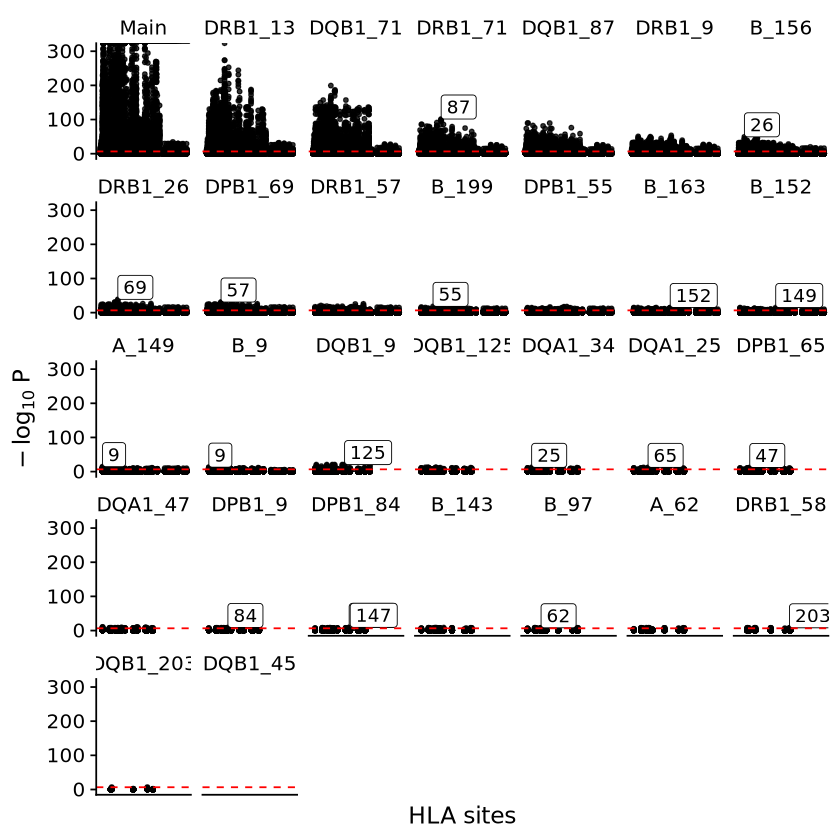

In [97]:
cond_hla_plot <- ggplot(hla_manova_conditional) +
    geom_point(aes(x = Site_hla, y = -log10(Pr..F.)), alpha=0.8, size=1, show.legend = FALSE) +
    geom_label(data = sig_sites_df, aes(x = Site_hla, y = -log10(Pr..F.), label = Site_hla), hjust=0,vjust=0, show.legend = FALSE) + 
    scale_color_viridis_d() +
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "red") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_wrap(~condition, ncol = 7) +
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank()) #+
    #geom_segment(data = hla_annotation, aes(x = start, xend = end, y=-0.01, yend=-0.01), color = 'blue', label = NA)
cond_hla_plot
#ggsave('../plots/cond_drb1_labelled.jpg',cond_hla_plot, width = 10, height = 5)

### Conditional in IBD

In [75]:
ibd_manova_conditional <- na.omit(fread('../conditional_analysis//IBD/manova_DRB1.tsv')) %>% arrange(Pr..F., desc(variance_explained))

In [78]:
ibd_manova_conditional

Res.Df,Df,Gen.var.,Pillai,approx.F,num.Df,den.Df,Pr..F.,pair,HLA,Site_hla,Length_cdr3,Position_cdr3,Omnibus,model,P_val,variance_explained,condition,cond_order
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>
1122,2,0.5889338,0.5434678,20.559159,40,2204,2.012245e-122,DRB1:67:15:P112,DRB1,67,15,P112,0.1308372,full,0,0.02785768,DRB1_13,1960
1121,4,0.5236460,0.6560473,11.378972,76,4408,1.644538e-120,DRB1:37:14:P109,DRB1,37,14,P109,0.1678313,full,0,0.04778116,DRB1_13,1960
1122,3,0.6042885,0.5925759,14.289377,57,3309,2.503567e-118,DRB1:71:13:P110,DRB1,71,13,P110,0.1566745,full,0,0.03415529,DRB1_13,1960
1122,3,0.4991007,0.5890231,14.182773,57,3309,2.435556e-117,DRB1:71:14:P110,DRB1,71,14,P110,0.1678623,full,0,0.03025880,DRB1_13,1960
1122,3,0.5808370,0.5813440,13.243740,60,3306,1.692030e-113,DRB1:71:14:P112,DRB1,71,14,P112,0.1541282,full,0,0.03209951,DRB1_13,1960
1122,2,0.6042885,0.5076118,19.745665,38,2206,1.215726e-112,DRB1:67:13:P110,DRB1,67,13,P110,0.1481136,full,0,0.02559435,DRB1_13,1960
1122,2,0.5808370,0.5105829,18.888677,40,2204,2.990565e-112,DRB1:67:14:P112,DRB1,67,14,P112,0.1491832,full,0,0.02715460,DRB1_13,1960
1121,3,0.6042925,0.5631965,13.405019,57,3306,4.303023e-110,DRB1:74:13:P110,DRB1,74,13,P110,0.1525838,full,0,0.03530170,DRB1_13,1960
1122,3,0.5889338,0.5658660,12.809163,60,3306,2.945173e-109,DRB1:71:15:P112,DRB1,71,15,P112,0.1267931,full,0,0.02381358,DRB1_13,1960


In [83]:
ibd_manova_conditional <- ibd_manova_conditional %>% 
    group_by(condition) %>% 
    mutate(cond_order = uniqueN(pair))  %>% 
    arrange(desc(cond_order)) %>% 
    ungroup()
ibd_order_df <- unique(ibd_manova_conditional$condition)
ibd_manova_conditional <- ibd_manova_conditional %>%
    mutate(condition = factor(condition, levels = ibd_order_df))
ibd_sig_sites_df <- ibd_manova_conditional %>% 
    group_by(condition) %>% 
    summarise(Pr..F. = min(Pr..F.)) %>%
    inner_join(ibd_manova_conditional, by = c('condition', 'Pr..F.'))

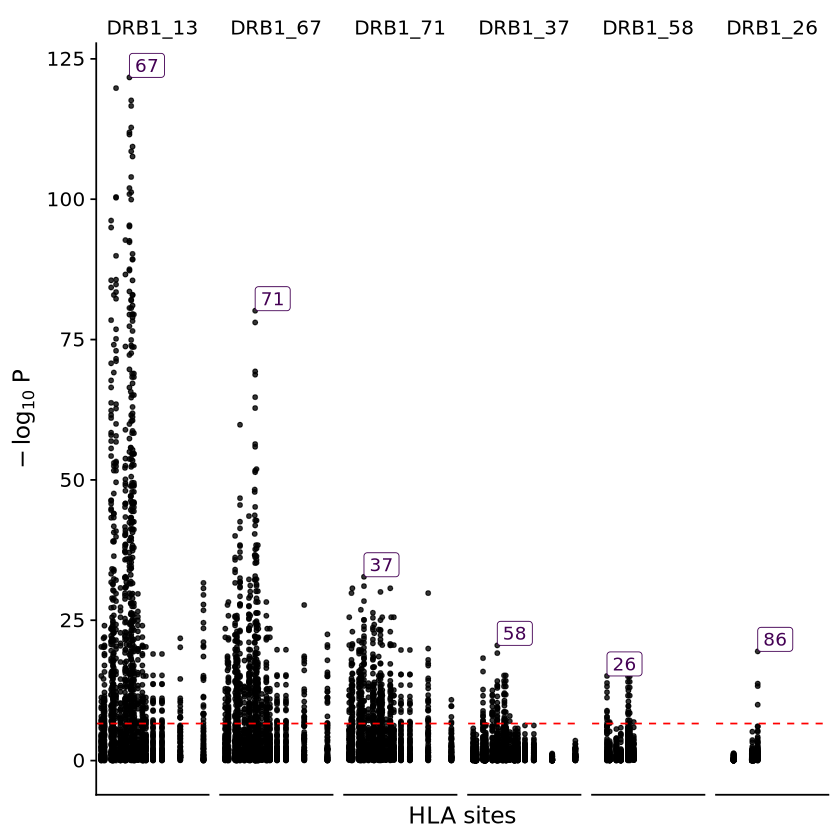

In [113]:
ibd_cond_hla_plot <- ggplot(ibd_manova_conditional) +
    geom_point(aes(x = Site_hla, y = -log10(Pr..F.)), alpha=0.8, size=1, show.legend = FALSE) +
    geom_label(data = ibd_sig_sites_df, aes(x = Site_hla, y = -log10(Pr..F.), label = Site_hla, colour = HLA), hjust=0,vjust=0, show.legend = FALSE) + 
    scale_color_viridis_d(name = 'rocket') +
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "red") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_wrap(~condition, ncol = 7,) +
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank()) #+
    #geom_segment(data = hla_annotation, aes(x = start, xend = end, y=-0.01, yend=-0.01), color = 'blue', label = NA)
ibd_cond_hla_plot
ggsave('../plots/ibd_cond_drb1_labelled.jpg',ibd_cond_hla_plot, width = 10, height = 7)

### Conditional in Healthy

In [93]:
healthy_manova_conditional <- na.omit(fread('../conditional_analysis//HEALTHY/manova_DRB1.tsv')) %>% arrange(Pr..F., desc(variance_explained))

In [94]:
healthy_manova_conditional <- healthy_manova_conditional %>% 
    group_by(condition) %>% 
    mutate(cond_order = uniqueN(pair))  %>% 
    arrange(desc(cond_order)) %>% 
    ungroup()
healthy_order_df <- unique(healthy_manova_conditional$condition)
healthy_manova_conditional <- healthy_manova_conditional %>%
    mutate(condition = factor(condition, levels = healthy_order_df))
healthy_sig_sites_df <- healthy_manova_conditional %>% 
    group_by(condition) %>% 
    summarise(Pr..F. = min(Pr..F.)) %>%
    inner_join(healthy_manova_conditional, by = c('condition', 'Pr..F.'))

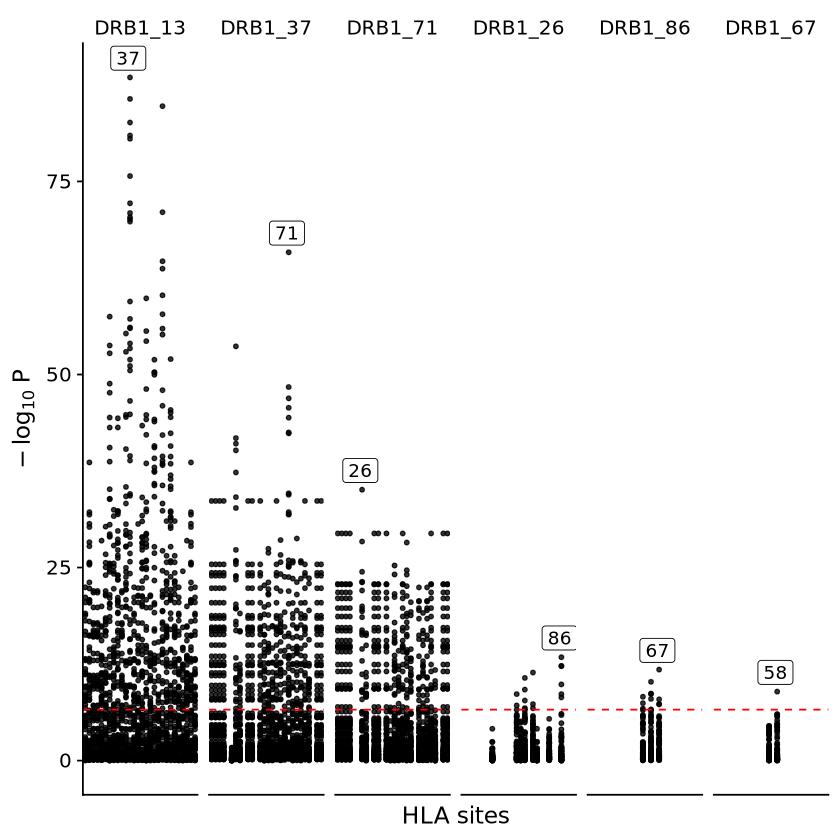

In [348]:
healthy_cond_hla_plot <- ggplot(healthy_manova_conditional) +
    geom_point(aes(x = Site_hla, y = -log10(Pr..F.)), alpha=0.8, size=1, show.legend = FALSE) +
    geom_label(data = healthy_sig_sites_df, aes(x = Site_hla, y = -log10(Pr..F.), label = Site_hla), hjust=0.55,vjust=-0.3, show.legend = FALSE) + 
    scale_color_viridis_d() +
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "red") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_wrap(~condition, ncol = 7,) +
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank()) 
    #geom_segment(data = hla_annotation, aes(x = start, xend = end, y=-0.01, yend=-0.01), color = 'blue', label = NA)
healthy_cond_hla_plot
ggsave('../plots/healthy_cond_drb1_labelled.jpg',healthy_cond_hla_plot, width = 10, height = 7)

In [35]:
ibd_main_manova <- na.omit(fread('../IBD//manova_results_downsampled.tsv'))%>% 
    separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = ':', remove = FALSE) %>%
    mutate(Site_hla = as.integer(Site_hla))


In [36]:
bonf <- 0.01/nrow(ibd_main_manova)
hla_genes <- c('A', 'C', 'B','DRB1','DQA1','DQB1','DPA1', 'DPB1')
for (gene in hla_genes){
    assign(gene, unlist(map(list.files(paste0('../conditional_analysis//IBD_downsampled/',gene,'/')), function(x) unlist(strsplit(x, '_'))[[2]])))
}

conditional_sites <- list()
for (i in seq(1, length(hla_genes))){
    conditional_sites[[hla_genes[i]]] <- get(hla_genes[i])
}
conditional_sites_df <- data.frame(HLA = names(conditional_sites)) %>% mutate(conditional_sites) %>% 
    unnest_longer(conditional_sites) %>% mutate(Site_hla = conditional_sites) %>%
    mutate(conditional_sites = as.integer(conditional_sites), Site_hla = as.integer(Site_hla))


In [37]:
ibd_main_manova <- ibd_main_manova %>% left_join(conditional_sites_df)
ibd_main_manova <- ibd_main_manova %>% mutate(HLA = factor(HLA, levels = hla_genes))
conditional_sites_with_pval <- na.omit(ibd_main_manova) %>% group_by(HLA, conditional_sites) %>% summarise(Pr..F. = min(Pr..F.), .groups = 'keep')

Joining with `by = join_by(HLA, Site_hla)`


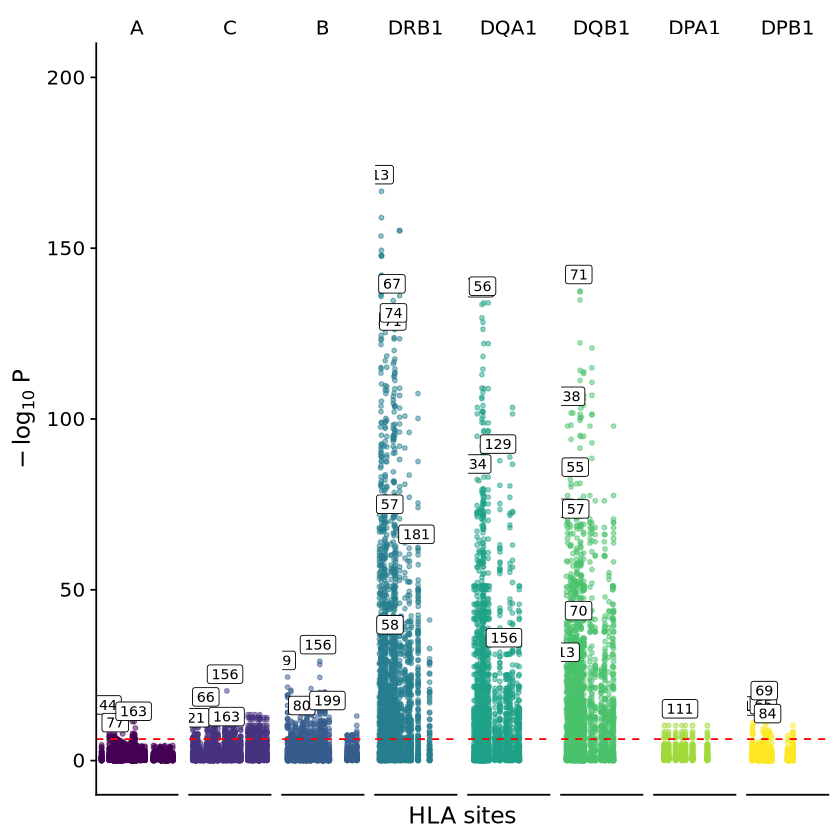

In [38]:
ibd_plot <- ggplot(ibd_main_manova) +
    geom_point(aes(x = Site_hla, y = -log10(Pr..F.), colour = HLA), alpha=0.5, size=1, show.legend = FALSE) +
    scale_color_viridis_d(name = 'magma') +
    new_scale_color() + 
    geom_label(data = conditional_sites_with_pval, aes(x = conditional_sites, y = -log10(Pr..F.), label = conditional_sites), 
               hjust=0.55,vjust=-0.4,size=3, show.legend = FALSE) + 
    scale_color_viridis_c(name = 'inferno') +
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "red") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_wrap(~factor(HLA, levels = hla_genes), ncol = 8) +
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank()) +
    ylim(0,200)
ibd_plot

In [18]:
ggsave('../plots/ibd_downsampled_manhattan_labelled.jpg',ibd_plot, width = 20, height = 6)

### Highlighting independent sites on the main Manhattan plot in HEALTHY

In [335]:
healthy_main_manova <- na.omit(fread('../HEALTHY//manova_results.tsv'))%>% 
    separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = ':', remove = FALSE) %>%
    mutate(Site_hla = as.integer(Site_hla))

In [337]:
for (gene in hla_genes){
    assign(gene, unlist(map(list.files(paste0('../conditional_analysis//HEALTHY/',gene,'/')), function(x) unlist(strsplit(x, '_'))[[2]])))
    }
conditional_sites <- list()
                            
for (i in seq(1, length(hla_genes))){
    conditional_sites[[hla_genes[i]]] <- get(hla_genes[i])
    }
conditional_sites_df <- data.frame(HLA = names(conditional_sites)) %>% mutate(conditional_sites) %>% 
    unnest_longer(conditional_sites) %>% mutate(Site_hla = conditional_sites) %>%
    mutate(conditional_sites = as.integer(conditional_sites), Site_hla = as.integer(Site_hla))

healthy_main_manova <- healthy_main_manova %>% left_join(conditional_sites_df)

healthy_main_manova <- healthy_main_manova %>% mutate(HLA = factor(HLA, levels = hla_genes))
conditional_sites_with_pval <- na.omit(healthy_main_manova) %>% group_by(HLA, conditional_sites) %>% summarise(Pr..F. = min(Pr..F.), .groups = 'keep')



Joining with `by = join_by(HLA, Site_hla)`


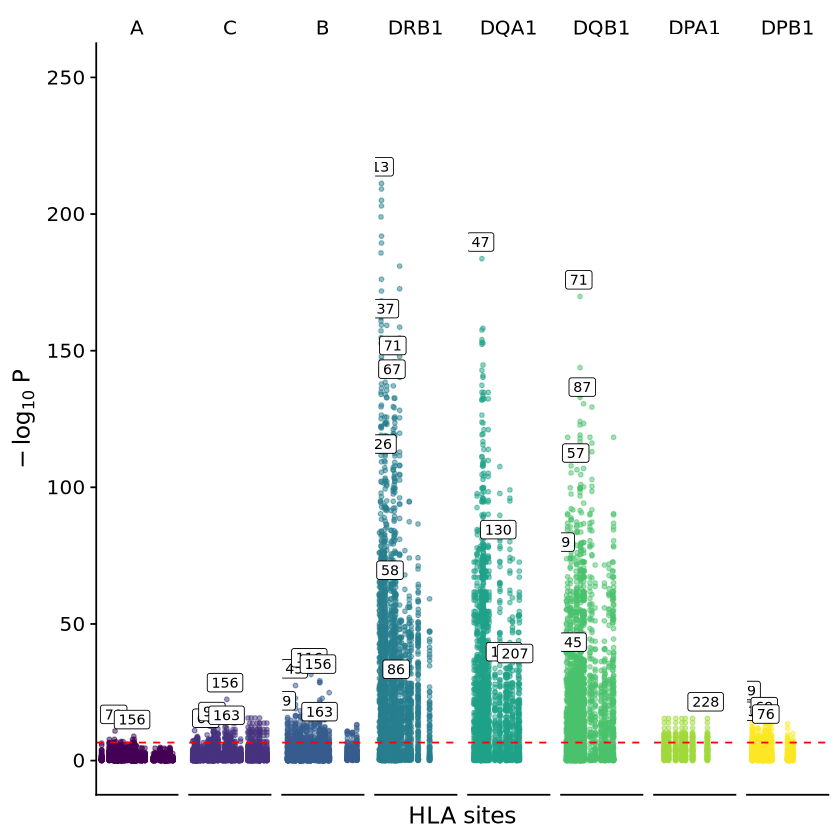

In [349]:
healthy_plot <- ggplot(healthy_main_manova) +
    geom_point(aes(x = Site_hla, y = -log10(Pr..F.), colour = HLA), alpha=0.5, size=1, show.legend = FALSE) +
    scale_color_viridis_d(name = 'mako') +
    new_scale_color() + 
    geom_label(data = conditional_sites_with_pval, aes(x = conditional_sites, y = -log10(Pr..F.), label = conditional_sites), 
               hjust=0.55,vjust=-0.4,size=3, show.legend = FALSE) + 
    #scale_color_viridis_c(name = 'inferno') +
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "red") +
    theme(legend.position = "none") +
    theme_cowplot() +
    facet_wrap(~factor(HLA, levels = hla_genes), ncol = 8) +
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank())+
    ylim(0,250)
healthy_plot

In [350]:
ggsave('../plots/healthy_manhattan_labelled.jpg',healthy_plot, width = 20, height = 6)

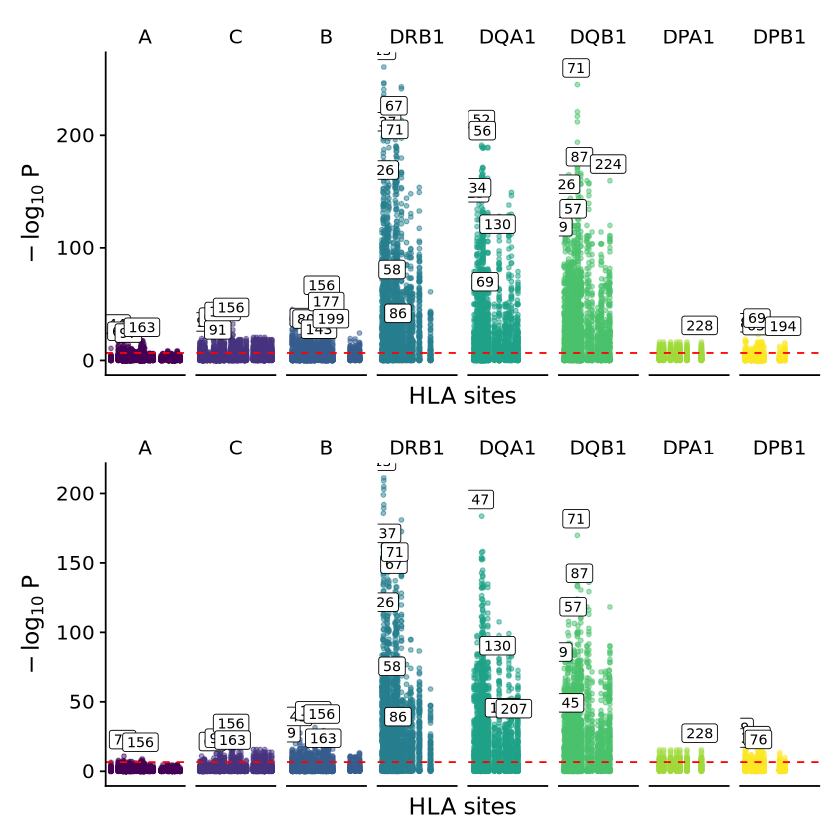

In [343]:
ibd_plot / healthy_plot

### Annotation with Pockets

In [182]:
manova_files <- list.files(path = '../conditional_analysis/all_9PCs/', pattern = "*.tsv", full.names = TRUE)
manova_df_all <- rbindlist(lapply(manova_files, fread))
fwrite(manova_df_all, '../conditional_analysis/conditional_both_9PCs.tsv', sep = '\t')

In [352]:
manova_df <- na.omit(fread('../manova_results_9PCs.tsv'))%>% 
    separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = ':', remove = FALSE) %>%
    mutate(Site_hla = as.integer(Site_hla)) 
bonf <- 0.01/nrow(ibd_main_manova)

hla_genes <- c('A', 'C', 'B','DRB1','DQA1','DQB1','DPA1', 'DPB1')
manova_df_all <- fread('../conditional_analysis/conditional_both_9PCs.tsv')
manova_df_all <- rbind(manova_df_all, manova_df %>% mutate(condition = "main"))
conditional_sites <- manova_df_all %>% 
    group_by(condition)  %>% 
    slice_min(Pr..F., with_ties = TRUE) %>%
    ungroup() %>% left_join(pockets_df, by = c('HLA', 'Site_hla'))
manova_df <- manova_df %>% mutate(Significance = ifelse(Pr..F. < bonf, 'yes', 'no'))

Warning message in left_join(., pockets_df, by = c("HLA", "Site_hla")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 3 of `x` matches multiple rows in `y`.
ℹ Row 142 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


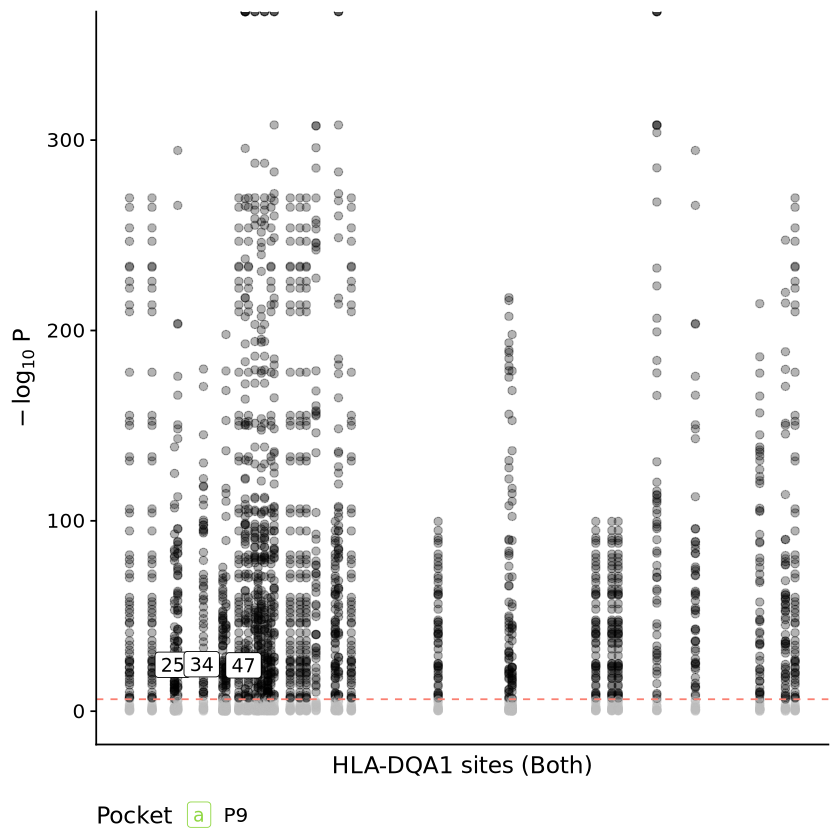

In [355]:
gene <- "DQA1"
annotated_plot_0 <- ggplot() +
    geom_point(data = manova_df %>% filter(HLA == gene) , 
               aes(x = Site_hla, y = -log10(Pr..F.), colour = Significance), alpha=0.3, size=2, show.legend = FALSE) +
    scale_color_manual(values = c('yes' = 'black', 'no' = 'grey')) +
    guides(color = 'none') 
annotated_plot <- annotated_plot_0 +
    new_scale_color() +  
    #geom_point(data = manova_annotated %>% filter(HLA == "DQB1"), 
     #          aes(x = Site_hla, y = -log10(Pr..F.), colour = Pocket), 
      #         alpha=0.6, size=1, show.legend = TRUE) + 
    #scale_color_manual(values = c('P4' = '#9c179e', 'P6' = '#21918c', 'P7' = '#feb078', 'P9' = '#90d743')) + 
    new_scale_color() + 
    geom_label(data = conditional_sites %>% filter(HLA == gene), 
               aes(x = Site_hla, y = -log10(Pr..F.), label = Site_hla ), 
               hjust=0.55,vjust=-0.4,size=4) + 
    geom_label(data = conditional_sites %>% filter(HLA == gene) %>% filter(!is.na(Pocket)), 
           aes(x = Site_hla, y = -log10(Pr..F.), label = Site_hla, colour = Pocket ), 
           hjust=0.55,vjust=-0.4,size=4) +
    scale_color_manual(values = c('P4' = '#482878', 'P6' = '#35b779', 'P7' = '#feb078', 'P9' = '#90d743')) +  
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = paste0("HLA-",gene," sites (Both)"), y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "salmon") +
    theme_cowplot() +
    #facet_wrap(~factor(HLA, levels = hla_genes), ncol = 8) +
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank(), legend.position = "bottom")+
    ylim(0,350)
annotated_plot

In [349]:
ggsave('../plots/dibd_labelled_drb1_9pcs.jpg',annotated_plot, width = 4, height = 6, dpi = 300)

### Visualise HEALTHY Pockets

In [132]:
healthy_main_manova <- na.omit(fread('../HEALTHY//manova_results.tsv'))%>% 
    separate(pair, into = c('HLA', 'Site_hla', 'Length_cdr3', 'Position_cdr3'), sep = ':', remove = FALSE) %>%
    mutate(Site_hla = as.integer(Site_hla)) 
bonf <- 0.01/nrow(ibd_main_manova)
hla_genes <- c('A', 'C', 'B','DRB1','DQA1','DQB1','DPA1', 'DPB1')

In [165]:
for (gene in hla_genes){
    assign(gene, unlist(map(list.files(paste0('../conditional_analysis//HEALTHY/',gene,'/')), function(x) unlist(strsplit(x, '_'))[[2]])))
    }
conditional_sites <- list()
                            
for (i in seq(1, length(hla_genes))){
    conditional_sites[[hla_genes[i]]] <- get(hla_genes[i])
    }
conditional_sites_df <- data.frame(HLA = names(conditional_sites)) %>% mutate(conditional_sites) %>% 
    unnest_longer(conditional_sites) %>% mutate(Site_hla = conditional_sites) %>%
    mutate(conditional_sites = as.integer(conditional_sites), Site_hla = as.integer(Site_hla))

healthy_main_manova_with_conditional_sites <- healthy_main_manova %>% left_join(conditional_sites_df) %>% 
    mutate(HLA = factor(HLA, levels = hla_genes))

healthy_main_manova_annotated <- healthy_main_manova_with_conditional_sites %>% left_join(pockets_df, by = c('HLA', 'Site_hla')) %>%
    mutate(Significance = ifelse(Pr..F. < bonf, 'yes', 'no'))
                            
conditional_sites_with_pval <- na.omit(healthy_main_manova_with_conditional_sites) %>% 
    group_by(HLA, Site_hla, conditional_sites) %>% 
    summarise(Pr..F. = min(Pr..F.), .groups = 'keep') %>% 
    left_join(pockets_df, by = c('HLA', 'Site_hla'))

healthy_main_only_pockets <- healthy_main_manova_annotated %>% filter(!is.na(Pocket)) %>% filter(!is.na(conditional_sites)) %>% mutate(Site_hla = as.integer(Site_hla))

Joining with `by = join_by(HLA, Site_hla)`
Warning message in left_join(., pockets_df, by = c("HLA", "Site_hla")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 36 of `x` matches multiple rows in `y`.
ℹ Row 73 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”


In [169]:
healthy_main_only_pockets %>% filter(Site_hla == 13)

Res.Df,Df,Gen.var.,Pillai,approx.F,num.Df,den.Df,Pr..F.,pair,HLA,Site_hla,Length_cdr3,Position_cdr3,Omnibus,model,P_val,variance_explained,conditional_sites,Pocket,Significance
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>
763,5,0.7794172,0.22178964,1.8175875,95,3720,2.950943e-06,DRB1:13:12:P106,DRB1,13,12,P106,0.03668007,full,0.000000e+00,0.013085766,13,P4,no
763,5,0.7844875,0.57662432,4.8428158,100,3715,9.120940e-48,DRB1:13:12:P107,DRB1,13,12,P107,0.07074400,full,0.000000e+00,0.034920944,13,P4,yes
763,5,0.7513032,0.60724381,5.4130911,95,3720,4.263880e-54,DRB1:13:12:P108,DRB1,13,12,P108,0.08126569,full,0.000000e+00,0.035782629,13,P4,yes
763,5,0.6539436,1.24092865,12.9266377,95,3720,1.477394e-165,DRB1:13:12:P109,DRB1,13,12,P109,0.17721584,full,0.000000e+00,0.085142984,13,P4,yes
763,5,0.6622098,1.14683374,11.6547254,95,3720,3.565156e-147,DRB1:13:12:P113,DRB1,13,12,P113,0.15694388,full,0.000000e+00,0.096007973,13,P4,yes
763,5,0.7390353,0.69085844,6.2779470,95,3720,4.988355e-67,DRB1:13:12:P114,DRB1,13,12,P114,0.07251047,full,0.000000e+00,0.051435296,13,P4,yes
763,5,0.8831921,0.16971589,1.3758439,95,3720,9.865017e-03,DRB1:13:12:P115,DRB1,13,12,P115,0.01870945,full,4.629160e-08,0.009837286,13,P4,no
755,5,0.8837980,0.13671521,1.2203786,85,3690,8.471919e-02,DRB1:13:12:P116,DRB1,13,12,P116,0.01495217,full,1.584628e-03,0.008341878,13,P4,no
461,5,0.9732194,0.08203469,0.9445398,40,2265,5.704774e-01,DRB1:13:12:P117,DRB1,13,12,P117,0.01811168,full,3.672172e-01,0.010000954,13,P4,no


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


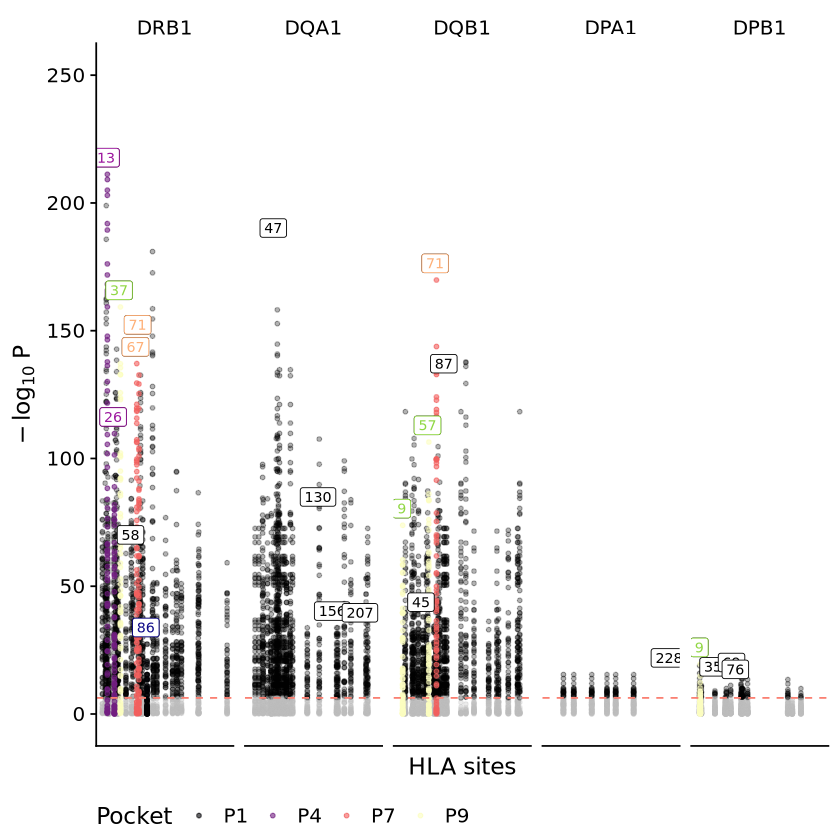

In [172]:
healthy_annotated_plot_0 <- ggplot() +
    geom_point(data = healthy_main_manova_annotated %>% filter(!(HLA %in% c('A', 'B', 'C'))) %>% filter(is.na(conditional_sites)), 
               aes(x = Site_hla, y = -log10(Pr..F.), colour = Significance), alpha=0.3, size=1, show.legend = FALSE) +
    scale_color_manual(values = c('yes' = 'black', 'no' = 'grey')) +
    guides(color = 'none') 

healthy_annotated_plot <- healthy_annotated_plot_0 +
    new_scale_color() + 
    geom_point(data = healthy_main_only_pockets %>% filter(!(HLA %in% c('A', 'B', 'C'))), 
               aes(x = Site_hla, y = -log10(Pr..F.), colour = Pocket), 
               alpha=0.6, size=1, show.legend = TRUE) + 
    scale_color_viridis_d(option = 'magma') + 
    new_scale_color() + 
    geom_label(data = conditional_sites_with_pval %>% filter(!(HLA %in% c('A', 'B', 'C'))), 
               aes(x = conditional_sites, y = -log10(Pr..F.), label = conditional_sites), 
               hjust=0.55,vjust=-0.4,size=3, show.legend = FALSE) + 
    scale_color_manual(values = c('P1' = '#0d0887', 'P4' = '#9c179e', 'P6' = '#21918c', 'P7' = '#feb078', 'P9' = '#90d743')) + 
    geom_label(data = conditional_sites_with_pval %>% filter(!(HLA %in% c('A', 'B', 'C'))) %>% filter(!is.na(Pocket)), 
               aes(x = conditional_sites, y = -log10(Pr..F.), label = conditional_sites, color = Pocket), 
               hjust=0.55,vjust=-0.4,size=3, show.legend = FALSE) + 
    scale_color_manual(values = c('P1' = '#0d0887', 'P4' = '#9c179e', 'P6' = '#21918c', 'P7' = '#feb078', 'P9' = '#90d743')) + 
    #scale_x_discrete(breaks = as.integer(seq(0,300, length.out = 5))) +
    labs(x = "HLA sites", y = expression(paste(-log[10], " ", P))) +
    geom_hline(yintercept= - log10(bonf), linetype="dashed", color = "salmon") +
    theme_cowplot() +
    facet_wrap(~factor(HLA, levels = hla_genes), ncol = 8) +
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "white"),  
          axis.ticks.x=element_blank(), legend.position = "bottom")+
    ylim(0,250)
healthy_annotated_plot

In [176]:
ggsave('../plots/healthy_annotated_plot.jpg',healthy_annotated_plot, width = 20, height = 6)

### Visualise both plus add more aesthetics

In [383]:
map(conditional_sites_both, as.integer) %>% map(sort)

$A
[1]   9  44  62 163

$C
[1]   9  21  66  77  91  99 156 163

$B
[1]   9  67  97 116 143 156 177 325

$DRB1
[1] 13 26 37 58 67 71 86

$DQA1
[1]  25  47 129 175 207

$DQB1
[1]  9 26 30 57 71 77 87

$DPA1
[1] 111

$DPB1
[1]   9  35  69 194

## Visualise the Power Analysis

In [206]:
power_path <- '../../TCellData/power_analysis/v1/'
manova_files <- list.files(path = power_path, pattern = "*.tsv", full.names = TRUE)
manova_df_all <- rbindlist(lapply(manova_files, fread), fill = TRUE)
fwrite(manova_df_all, paste0(power_path,'../manova_power_all.tsv'), sep = '\t')


In [244]:
manova_df_all <- fread(paste0(power_path,'../manova_power_all.tsv'))
manova_df_all <- manova_df_all[, c("HLA", "Site_hla", "cdr3_length", "IMGT") := tstrsplit(pair, "_", fixed = TRUE)]
manova_dqb1 <- manova_df_all[replic == 1 & HLA == 'DQB1']

In [276]:
bonf <- 0.01/20000
sig_sites_600 <- unique(manova_dqb1[size == 600 & Pr..F. <= bonf]$pair)
sig_sites_800 <- unique(manova_dqb1[size == 800 & Pr..F. <= bonf]$pair)
sig_sites_1188 <- unique(manova_dqb1[size == 1188 & Pr..F. <= bonf]$pair)
diff_600_800 <- setdiff(sig_sites_800, sig_sites_600)
diff_800_1188 <- setdiff(sig_sites_1188, sig_sites_800)
manova_dqb1_800 <- manova_dqb1[size == 800][,new_sites := ifelse(pair %in% diff_600_800, 'novel', 'already discovered')]
manova_dqb1_1188 <- manova_dqb1[size == 1188][,new_sites := ifelse(pair %in% diff_800_1188, 'novel', 'already discovered')]
new_sites_df <- rbind(manova_dqb1_800, manova_dqb1_1188) 
manova_dqb1_highlighted <- left_join(manova_dqb1, new_sites_df) 

Joining with `by = join_by(Res.Df, Df, Gen.var., Pillai, approx.F, num.Df, den.Df, Pr..F., pair, rep, size, Omnibus, model, P_val, replic, RSS, Sum.of.Sq, F, HLA, Site_hla, cdr3_length, IMGT)`


In [277]:
unique(manova_dqb1_highlighted$size)

[1] 1188  400  600  800

Warning message:
“Removed 11760 rows containing missing values or values outside the scale range (`geom_point()`).”


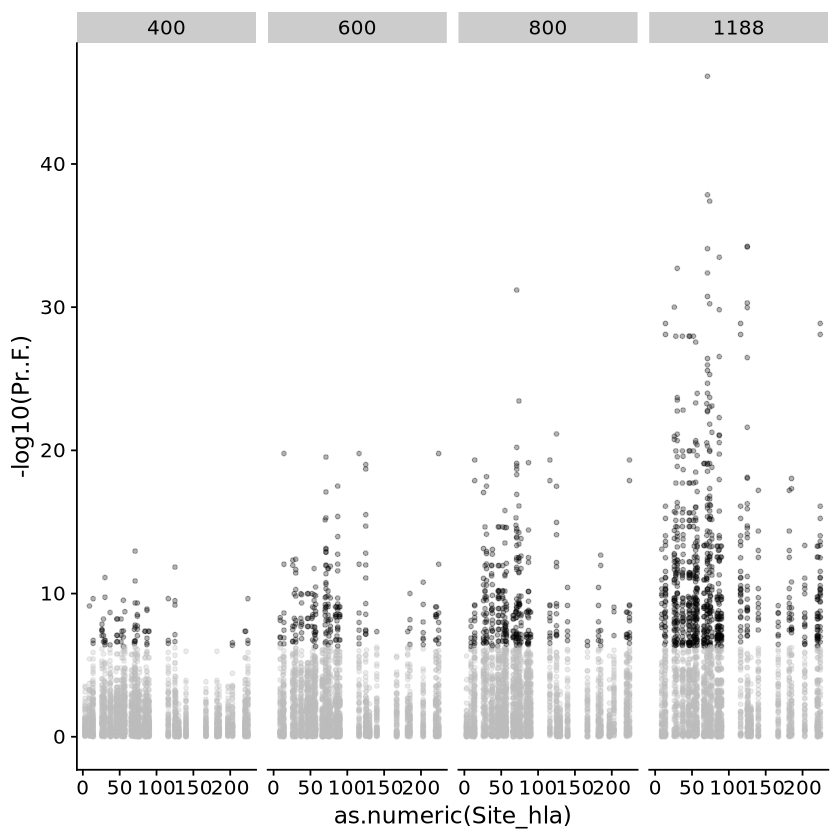

In [286]:
p1 <- ggplot() +
    geom_point(data = manova_dqb1 , aes(x = as.numeric(Site_hla), y = -log10(Pr..F.), colour = ifelse(Pr..F. <=bonf, 'yes', 'no')), 
                                    alpha=0.3, size=1, show.legend = FALSE) +
    scale_color_manual(values = c('yes' = 'black', 'no' = 'grey')) +
    facet_grid(~size) + 
    theme_cowplot() 
p1


Warning message:
“Removed 11760 rows containing missing values or values outside the scale range (`geom_point()`).”


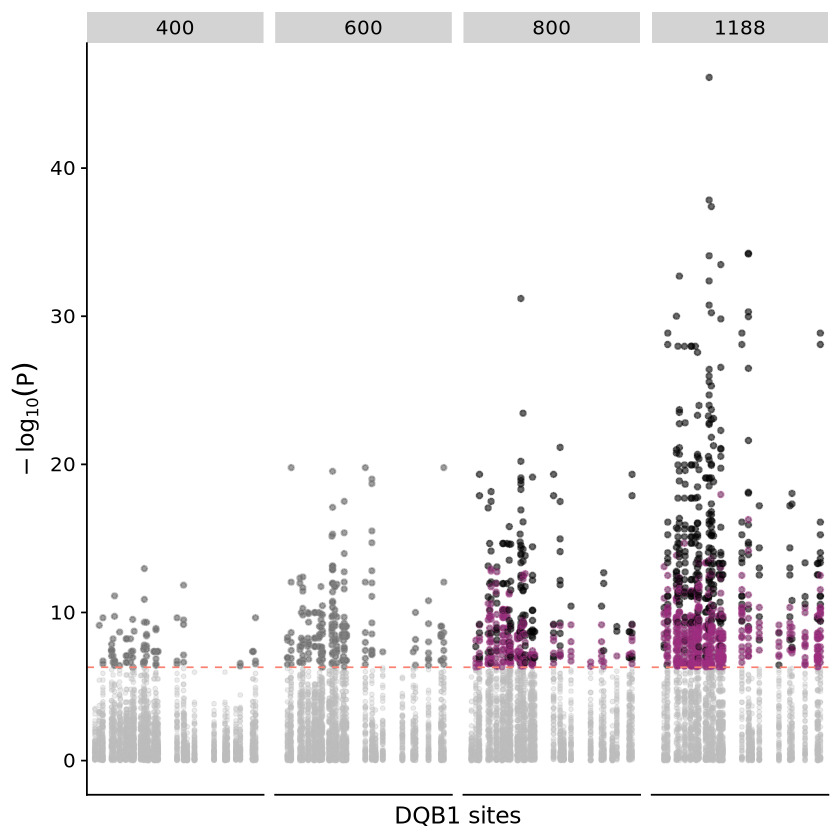

In [323]:
p2 <- p1 + 
    new_scale_color() +
    geom_point(data = manova_dqb1_highlighted %>% filter(Pr..F. <= bonf),
               aes(x = as.numeric(Site_hla), y = -log10(Pr..F.), color = (new_sites == 'novel')), 
                                    alpha=0.4, size=1.5, show.legend = FALSE) + 
    scale_color_manual(values = c('TRUE' = '#9e2f7f', 'FALSE' = 'black')) +
    facet_grid(~size) + 
    geom_hline(yintercept = -log10(bonf), color = 'salmon', linetype = "dashed", size = 0.5) + 
    labs(x = "DQB1 sites", y = expression(-log[10](P)), color = "Novel sites") +
    theme_cowplot() + 
    theme(axis.text.x = element_blank(), strip.background = element_rect(fill = "lightgrey"),  
          axis.ticks.x=element_blank(), legend.position = "bottom")
p2

In [324]:
ggsave('../plots/power_analysis_vis.png', p2, width = 10, height = 5)

Warning message:
“Removed 11760 rows containing missing values or values outside the scale range (`geom_point()`).”
